# Gym Churn Prediction — Machine Learning Coursework

This notebook implements a complete end-to-end machine learning workflow for predicting gym membership churn.

**Block 1 goal:**  
Set up imports, reproducibility, and color palette.

Run the next code cell to initialize the environment.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, random, os

warnings.filterwarnings("ignore")

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Color palette 
PALETTE = ["#ffa600", "#ff6361", "#bc5090", "#58508d", "#003f5c"]
sns.set_style("whitegrid")
sns.set_palette(PALETTE)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETTE)
plt.rcParams["figure.dpi"] = 110

print("Environment initialized. Ready for dataset loading.")


Environment initialized. Ready for dataset loading.


## Part 2 — Load the Dataset

In this step, we load the gym churn dataset from the expected path:

**`/dataset/gym_churn_us.csv`**

We also display its shape and first few rows to confirm successful loading.


In [ ]:
DATA_PATH = "dataset\gym_churn_us.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully.")
print("Shape:", df.shape)

df.head()


✅ Dataset loaded successfully.
Shape: (4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Part 3 — Dataset Overview

In this step, we explore the dataset structure:

- Column names
- Data types
- Non-null counts
- Basic descriptive statistics

This helps us understand the data before cleaning or preprocessing.


In [4]:
print("=== Dataset Info ===")
df.info()

print("\n=== Descriptive Statistics (Numerical Columns) ===")
df.describe().T

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


## Part 4 — Missing Values Analysis

Before preprocessing, we must check how many missing values each column contains.
This helps us decide whether to impute, drop, or engineer around missing data.

The output will list:
- Total missing values per column
- Percentage of missing data


In [5]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
})

print("=== Missing Values per Column ===")
missing_df[missing_df["missing_count"] > 0]


=== Missing Values per Column ===


,missing_count,missing_percent


## Part 5 — Set Target Column & Check Class Distribution

The dataset is about gym membership churn, so the target variable is explicitly:

**`churn`**

In this step, we:
- Set the target column
- Display the value counts for each class
- Visualize the class distribution using the official color palette

This confirms whether the dataset is balanced or imbalanced.


Target column: Churn

=== Class Value Counts ===


,count
Churn,
0,2939
1,1061


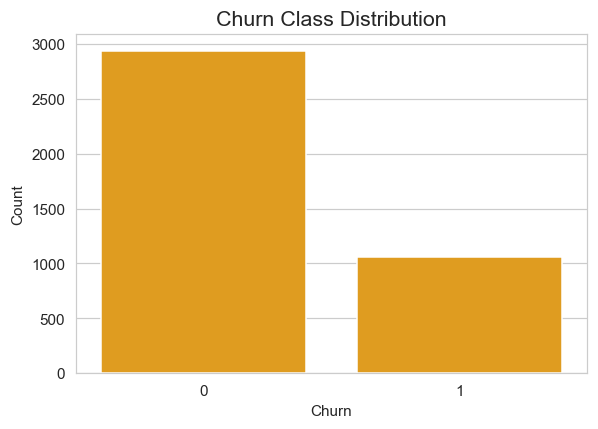

In [6]:
# Explicitly set the target variable
target_col = "Churn"

# Check if the target exists
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset.")

print("Target column:", target_col)
print("\n=== Class Value Counts ===")
display(df[target_col].value_counts().to_frame("count"))

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Churn Class Distribution", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


## Part 6 — Exploratory Data Analysis: Numerical Feature Distributions

Understanding how numerical features are distributed helps identify:
- Skewed variables
- Potential outliers
- Differences in scale
- Whether transformations may be needed later

We plot histograms for all numerical columns using the project color palette.


Numerical Columns: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


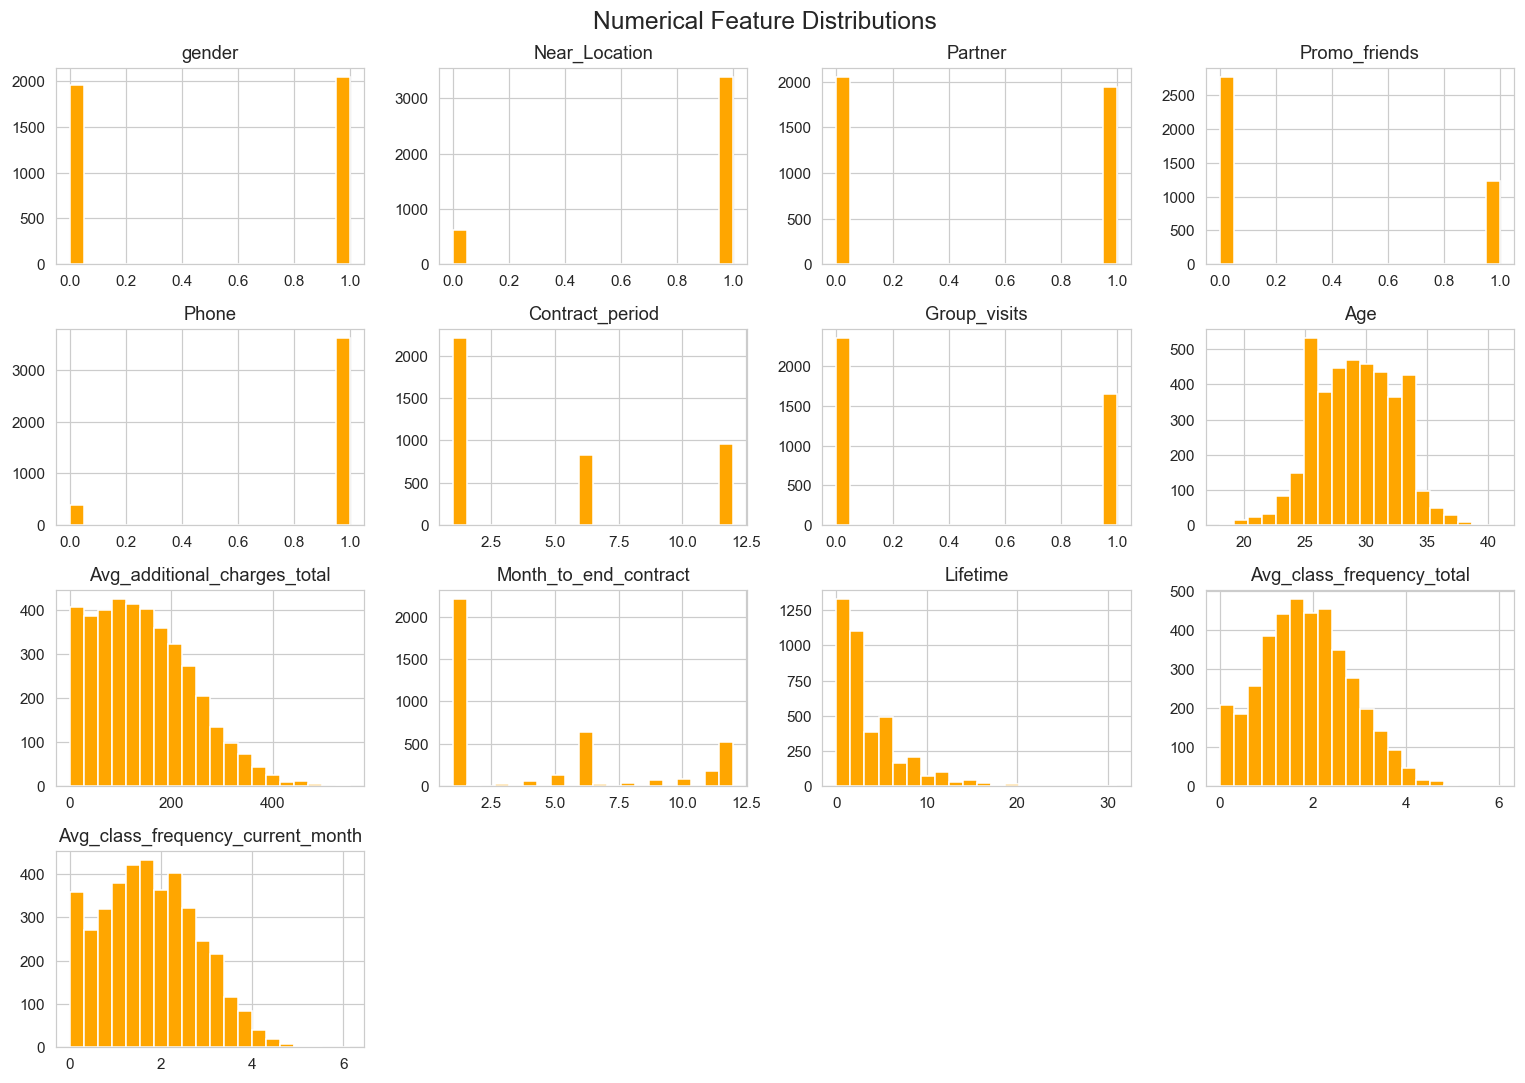

In [7]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Remove the target if it's numeric (sometimes encoded as 0/1)
if target_col in num_cols:
    num_cols.remove(target_col)

print("Numerical Columns:", num_cols)

# Plot histograms
df[num_cols].hist(figsize=(14, 10), bins=20, color=PALETTE[0])
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


## Part 7 — Correlation Matrix (Heatmap)

Correlation analysis helps identify:
- Strong relationships between features
- Redundant or highly collinear variables
- Features that may be highly predictive of churn

We will compute the correlation matrix using numerical features and visualize it with a heatmap.


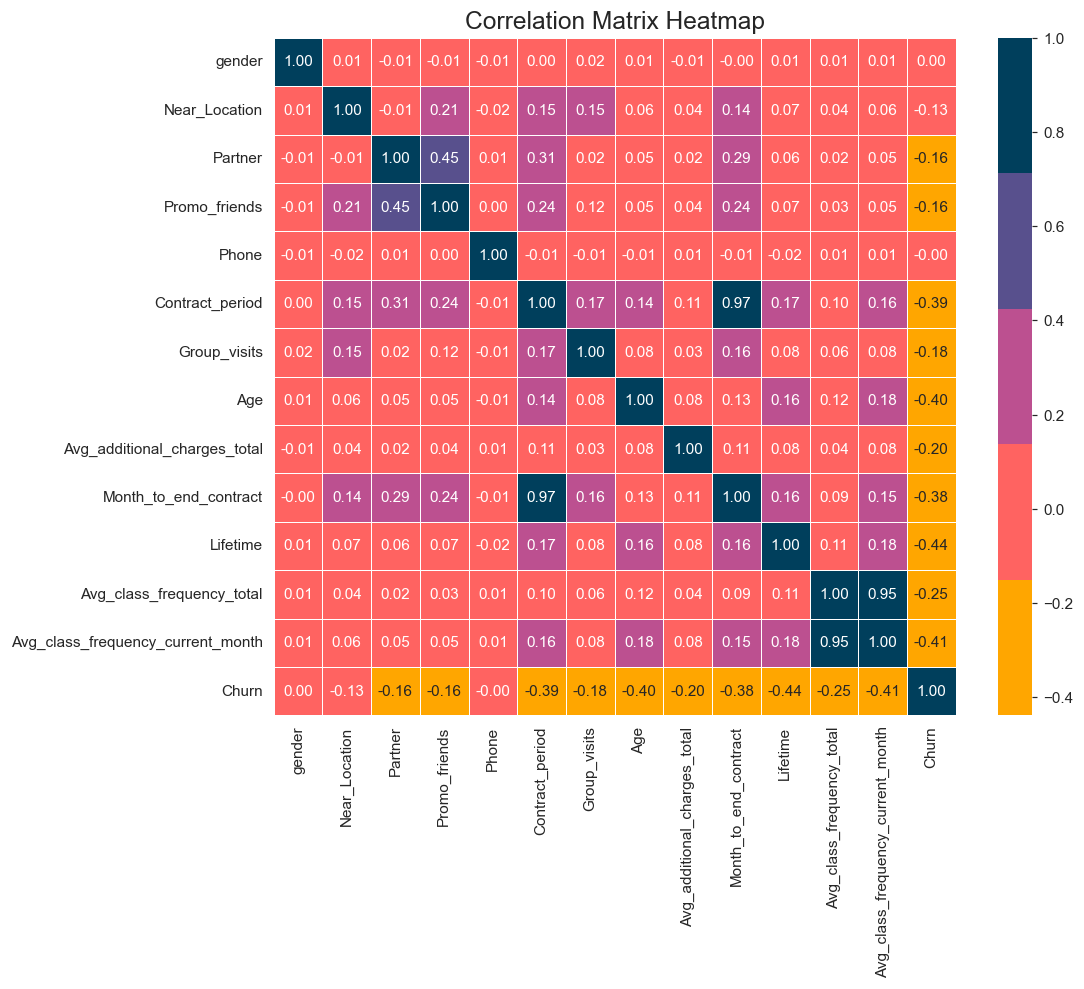

In [8]:
# Compute correlation matrix for numerical features
corr_matrix = df[num_cols + [target_col]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=PALETTE, 
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


## Part 8 — Outlier Detection Using Boxplots

Outliers can significantly affect:
- Scaling
- Model performance
- Statistical distributions

In this step, we visualize outliers in all numerical features using boxplots.
This helps us decide whether to clip, transform, or leave the values unchanged.


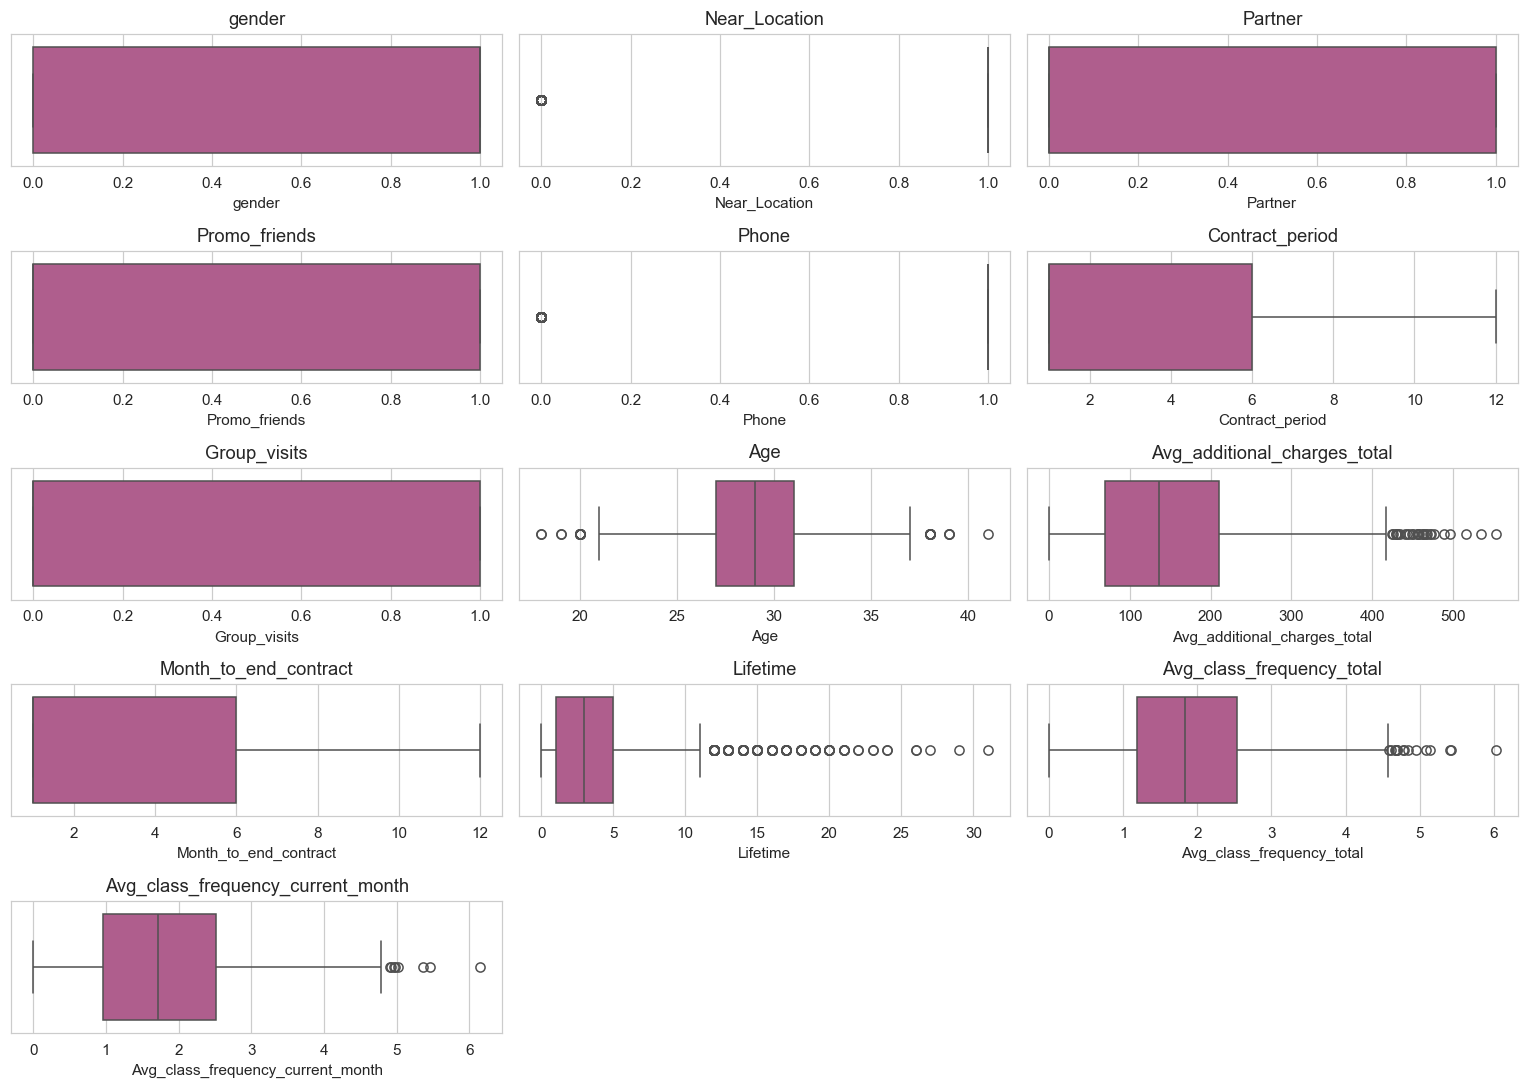

In [9]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df[col], color=PALETTE[2])
    plt.title(col)

plt.tight_layout()
plt.show()


## Part 8 — Unsupervised Analysis: K‑Means Clustering

We run K‑Means on the numerical features to discover membership segments. 
We will evaluate k using the elbow (inertia) and silhouette score, assign cluster labels, 
and visualize clusters in 2D using PCA.

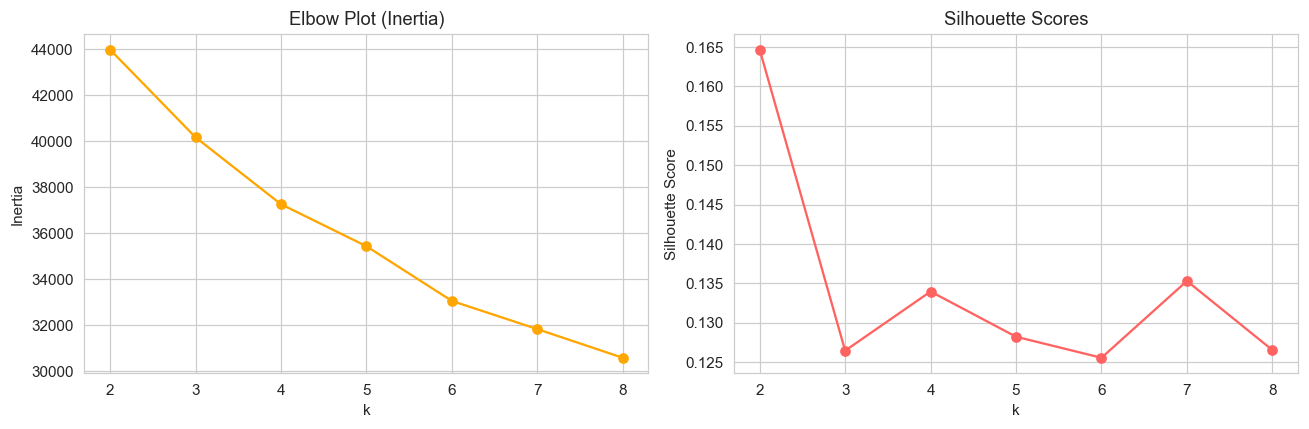

Selected k = 2


In [10]:
# Part 8 — KMeans: elbow + silhouette to choose k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# choose features for clustering: use numerical_features if available, else fallback to num_cols
feat_cols = numerical_features if 'numerical_features' in globals() else (num_cols if 'num_cols' in globals() else df.select_dtypes(include=["number"]).columns.tolist())

X_cluster = df[feat_cols].copy()

# drop rows with NA in clustering features (briefly)
mask_na = X_cluster.dropna().index
X_cluster = X_cluster.loc[mask_na]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

inertias = []
sil_scores = []
K_RANGE = range(2, 9)

for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=RANDOM_SEED, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    try:
        sil = silhouette_score(X_scaled, labels)
    except Exception:
        sil = float('nan')
    sil_scores.append(sil)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_RANGE), inertias, '-o', color=PALETTE[0])
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Plot (Inertia)')

plt.subplot(1,2,2)
plt.plot(list(K_RANGE), sil_scores, '-o', color=PALETTE[1])
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

# choose k with highest silhouette (exclude nan); fallback to elbow heuristics
valid_idx = [i for i, s in enumerate(sil_scores) if not np.isnan(s)]
if valid_idx:
    best_k = list(K_RANGE)[int(np.nanargmax(sil_scores))]
else:
    # fallback to elbow: choose k at which inertia drop slows (simple heuristic: argmin of second derivative)
    diffs = np.diff(inertias)
    second_diffs = np.diff(diffs)
    if len(second_diffs) > 0:
        elbow_idx = int(np.argmin(second_diffs)) + 1
        best_k = list(K_RANGE)[elbow_idx]
    else:
        best_k = 3

print(f"Selected k = {best_k}")

Cluster sizes:
kmeans_cluster
0    2537
1    1463
Name: count, dtype: int64

Cluster centers (in original feature space, scaled back):


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0.506898,0.793457,0.340166,0.181317,0.906583,1.724872,0.336618,28.744580,137.465582,1.648009,3.106031,1.724416,1.554635
1,0.516063,0.935065,0.740943,0.529050,0.898154,9.807929,0.543404,29.946685,163.379857,8.961039,4.797676,2.147120,2.135405



Cluster means (data-driven):


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
kmeans_cluster,,,,,,,,,,,,,
0,0.507,0.793,0.340,0.181,0.907,1.725,0.337,28.745,137.466,1.648,3.106,1.724,1.555
1,0.516,0.935,0.741,0.529,0.898,9.808,0.543,29.947,163.380,8.961,4.798,2.147,2.135


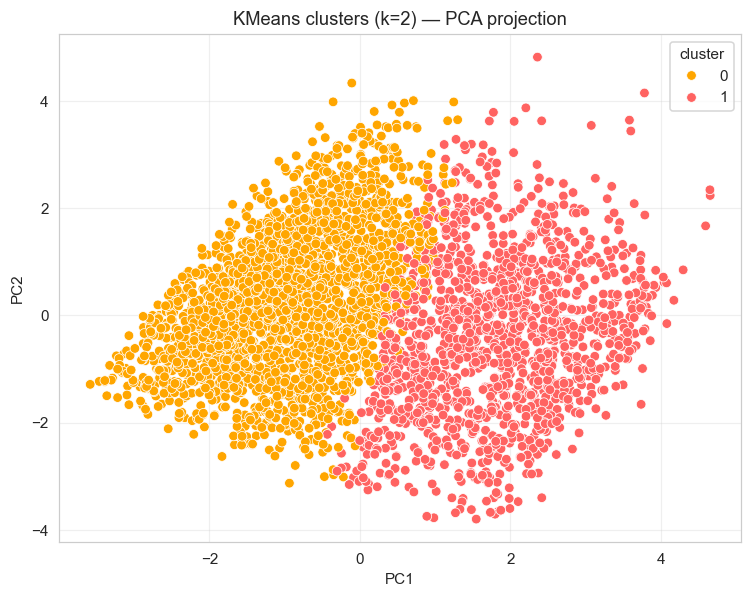


Added column df["kmeans_cluster"] (NaN for rows excluded due to missing clustering features).


In [11]:
# Part 21b — Fit final KMeans, attach labels, and visualize clusters (PCA)
from sklearn.decomposition import PCA

k_final = best_k
kmeans_final = KMeans(n_clusters=k_final, random_state=RANDOM_SEED, n_init=20)
kmeans_final.fit(X_scaled)
labels_final = kmeans_final.predict(X_scaled)

# Create a copy of original df rows used in clustering, attach labels
clustered_df = df.loc[mask_na].copy()
clustered_df['kmeans_cluster'] = labels_final

print('Cluster sizes:')
print(clustered_df['kmeans_cluster'].value_counts().sort_index())

print('\nCluster centers (in original feature space, scaled back):')
centers_scaled = kmeans_final.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=feat_cols)
display(centers_df)

print('\nCluster means (data-driven):')
display(clustered_df.groupby('kmeans_cluster')[feat_cols].mean().round(3))

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_final, palette=PALETTE, s=40, legend='full')
plt.title(f'KMeans clusters (k={k_final}) — PCA projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='cluster')
plt.grid(alpha=0.3)
plt.show()

# Optionally merge cluster labels back into the main df
df.loc[clustered_df.index, 'kmeans_cluster'] = clustered_df['kmeans_cluster']
print('\nAdded column df["kmeans_cluster"] (NaN for rows excluded due to missing clustering features).')

## Part 9 — Categorical Feature Analysis

Categorical variables often reveal patterns that help predict churn.
In this step, we:

- Identify categorical columns
- Display value counts for each
- Plot bar charts to visualize category distributions

Some datasets encode categorical variables as numbers (e.g., 0/1 for gender, 1–4 for membership type).  
This step detects numeric columns with low unique values that may actually be categorical.


In [12]:
# Identify categorical columns (exclude target)
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
if target_col in cat_cols:
    cat_cols.remove(target_col)

print("Categorical Columns:", cat_cols)

# Display value counts and bar plots
for col in cat_cols:
    print(f"\n=== Value Counts: {col} ===")
    display(df[col].value_counts().to_frame("count"))

    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, palette=PALETTE)
    plt.title(f"{col} — Category Distribution")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Find numeric columns with low cardinality (possible categorical)
potential_cat = []

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    unique_vals = df[col].nunique()
    if 2 <= unique_vals <= 10:  # typical categorical range
        potential_cat.append((col, unique_vals))

potential_cat


Categorical Columns: []


[('gender', 2),
 ('Near_Location', 2),
 ('Partner', 2),
 ('Promo_friends', 2),
 ('Phone', 2),
 ('Contract_period', 3),
 ('Group_visits', 2),
 ('Churn', 2),
 ('kmeans_cluster', 2)]

## Part 10 — Define Feature Categories for Preprocessing

Based on the dataset inspection, several features are numeric but represent categories.
We classify all features into:

- Numerical features
- Binary categorical features (0/1)
- Multi-class categorical features (require One-Hot Encoding)

This structure will be used in the preprocessing pipeline.


In [13]:
# Binary categorical features (2 unique values)
binary_cat_features = [
    "gender",
    "Near_Location",
    "Partner",
    "Promo_friends",
    "Phone",
    "Group_visits"
]

# Multi-class categorical features (require One-Hot)
multi_cat_features = [
    "Contract_period"
]

# Numerical features = all numeric minus categorical + target
numerical_features = [
    col for col in df.select_dtypes(include=["int64", "float64"]).columns
    if col not in binary_cat_features + multi_cat_features + [target_col]
]

print("Numerical Features:", numerical_features)
print("Binary Categorical:", binary_cat_features)
print("Multi-class Categorical:", multi_cat_features)

all_assigned = set(binary_cat_features + multi_cat_features + numerical_features + [target_col])
unassigned = [col for col in df.columns if col not in all_assigned]

print("Unassigned Columns:", unassigned)


Numerical Features: ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'kmeans_cluster']
Binary Categorical: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']
Multi-class Categorical: ['Contract_period']
Unassigned Columns: []


## Part 11 — Train/Test Split Preparation

Now that numerical and categorical features have been identified, we prepare the dataset for modeling.

Steps:
1. Separate the features (X) and target (y)
2. Perform a train/test split with stratification to preserve churn ratio
3. Confirm the resulting shapes of training and testing sets


In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_SEED
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nTarget distribution in train:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in test:")
print(y_test.value_counts(normalize=True))


Train shape: (3200, 14)
Test shape: (800, 14)

Target distribution in train:
Churn
0    0.734688
1    0.265313
Name: proportion, dtype: float64

Target distribution in test:
Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


## Part 12 — Preprocessing Pipeline

We now build a preprocessing pipeline that applies:

- **Standard Scaling** to numerical features  
- **One-Hot Encoding** to multi-class categorical features  
- **Pass-through** for binary categorical features (already encoded as 0/1)

This ensures consistent preprocessing for every model we train.

We use:
- `ColumnTransformer` to apply transformations to selected column groups
- `Pipeline` to connect preprocessing with ML models later


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numerical transformation
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Multi-class transformation (One-Hot)
multi_cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# Full preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical_features),
        ("multi_cat", multi_cat_transformer, multi_cat_features),
        ("binary_cat", "passthrough", binary_cat_features)
    ]
)

print("Preprocessing pipeline created successfully.")


Preprocessing pipeline created successfully.


## Part 13 — Baseline Models

We will train two baseline classifiers:

1. Logistic Regression (interpretable linear baseline)
2. Decision Tree (non-linear baseline, interpretable)

Procedure:
- Wrap each model in a `Pipeline` with the `preprocessor`.
- Evaluate with Stratified K-Fold cross-validation (ROC-AUC).
- Fit on the full training set and evaluate on the test set using:
  - Accuracy, Precision, Recall, F1-score
  - Confusion matrix
  - ROC curve

Run the next code cell to execute training and evaluation.


=== Cross-validated ROC-AUC scores ===
LogisticRegression: mean ROC-AUC = 0.9753 ± 0.0046
DecisionTree: mean ROC-AUC = 0.8470 ± 0.0079

--- LogisticRegression Test Evaluation ---
Accuracy: 0.9237
Precision: 0.8794
Recall: 0.8255
F1-score: 0.8516
ROC-AUC: 0.9774

Confusion Matrix:
[[564  24]
 [ 37 175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800


--- DecisionTree Test Evaluation ---
Accuracy: 0.8925
Precision: 0.8182
Recall: 0.7642
F1-score: 0.7902
ROC-AUC: 0.8515

Confusion Matrix:
[[552  36]
 [ 50 162]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       588
           1       0.82      0.76      0.79      

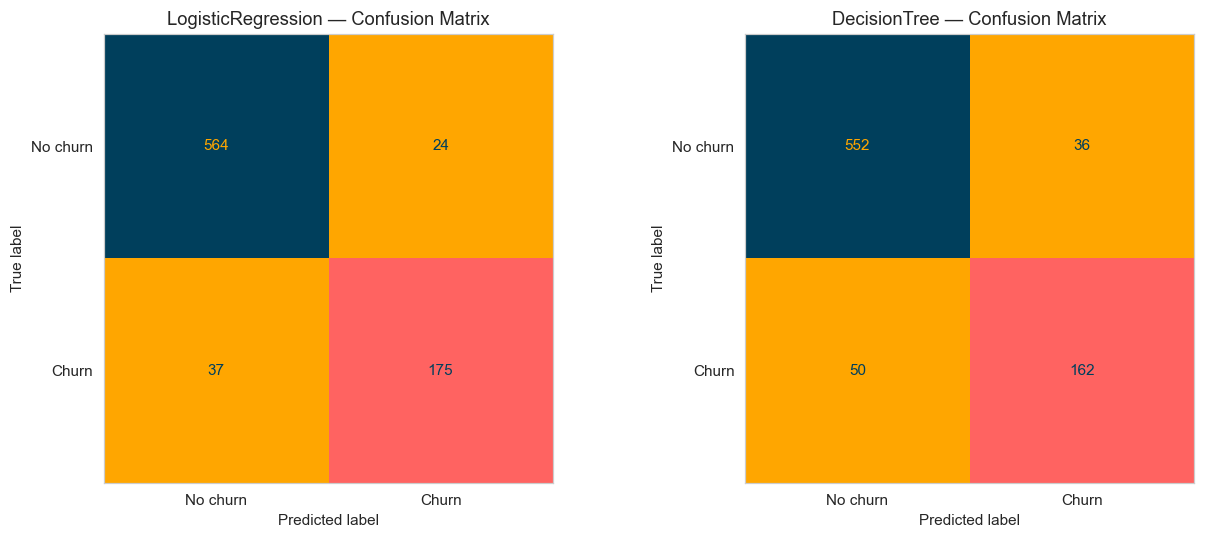

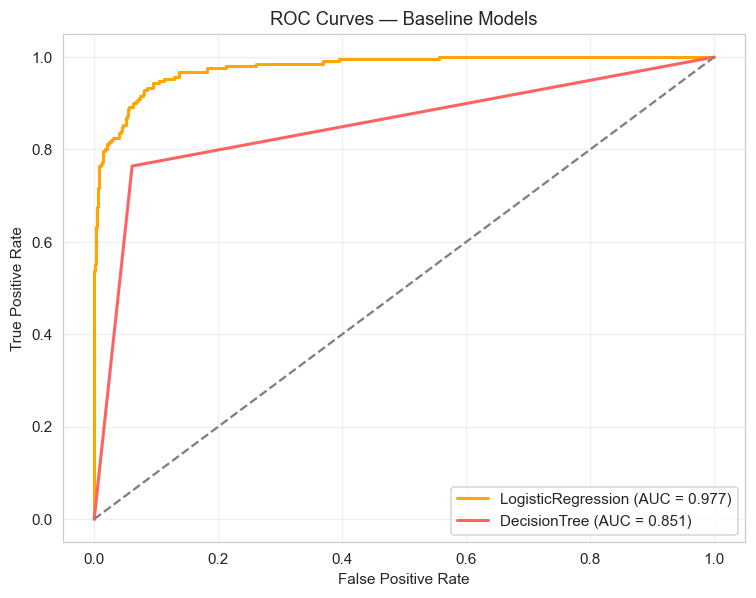

In [16]:
# Set the models colors
MODEL_COLORS = {
    "LogisticRegression": PALETTE[0],   # darkest
    "DecisionTree": PALETTE[1],
    "RandomForest": PALETTE[2],
    "XGBoost": PALETTE[3],
    "MLP": PALETTE[4]                   # brightest
}

PALETTE = ["#ffa600", "#ff6361", "#bc5090", "#58508d", "#003f5c"]
from matplotlib.colors import ListedColormap
cm_cmap = ListedColormap(PALETTE)
MODEL_COLORS

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, classification_report,
    ConfusionMatrixDisplay      # <-- ADD THIS
)
from sklearn.pipeline import Pipeline

# 1) Define models wrapped in full pipelines
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(random_state=RANDOM_SEED, max_iter=1000))
])

dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=RANDOM_SEED))
])

models = {
    "LogisticRegression": lr_pipeline,
    "DecisionTree": dt_pipeline
}

# 2) Cross-validated ROC-AUC (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

print("=== Cross-validated ROC-AUC scores ===")
for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
    print(f"{name}: mean ROC-AUC = {scores.mean():.4f} ± {scores.std():.4f}")

# 3) Fit on full training set and evaluate on test set
results = {}
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline[-1], "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else float("nan")

    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

    print(f"\n--- {name} Test Evaluation ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

#  Confusion Matrix Graphs
fig, axes = plt.subplots(1, len(results), figsize=(6 * len(results), 5))

# Handle case of single model (so axes is not an array)
if len(results) == 1:
    axes = [axes]

for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res["y_pred"])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No churn", "Churn"]  
    )
    disp.plot(
        ax=axes[i],
        cmap=cm_cmap,          # use magma to match your theme
        colorbar=False
    )
    axes[i].set_title(f"{name} — Confusion Matrix")
    axes[i].grid(False)       # confusion matrix looks cleaner without grid

plt.tight_layout()
plt.show()

# 4) ROC Curves plot
plt.figure(figsize=(8,6))
for i, (name, res) in enumerate(results.items()):
    if res["y_proba"] is not None:
        fpr, tpr, _ = roc_curve(y_test, res["y_proba"])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr,
            tpr,
            label=f"{name} (AUC = {roc_auc:.3f})",
            color=list(MODEL_COLORS.values())[i],
            linewidth=2
        )
    else:
        print(f"Model {name} has no probability estimates; skipping ROC plot.")

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Baseline Models")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


## Part 14 — train Advanced Models

Advanced models to train now:
- Random Forest
- Gradient Boosting (sklearn)
- MLPClassifier (neural network)

We will:
1. Run 5-fold stratified CV (ROC-AUC).
2. Fit on training data and evaluate on the test set.
3. Plot ROC curves using the reversed palette.


=== Advanced Models Cross-validated ROC-AUC ===
RandomForest: mean ROC-AUC = 0.9703 ± 0.0078
GradientBoosting: mean ROC-AUC = 0.9810 ± 0.0041
MLP: mean ROC-AUC = 0.9865 ± 0.0022

--- RandomForest Test Evaluation ---
Accuracy: 0.9250
Precision: 0.8800
Recall: 0.8302
F1-score: 0.8544
ROC-AUC: 0.9693
Confusion Matrix:
[[564  24]
 [ 36 176]]

--- GradientBoosting Test Evaluation ---
Accuracy: 0.9475
Precision: 0.9208
Recall: 0.8774
F1-score: 0.8986
ROC-AUC: 0.9809
Confusion Matrix:
[[572  16]
 [ 26 186]]

--- MLP Test Evaluation ---
Accuracy: 0.9513
Precision: 0.9261
Recall: 0.8868
F1-score: 0.9060
ROC-AUC: 0.9827
Confusion Matrix:
[[573  15]
 [ 24 188]]


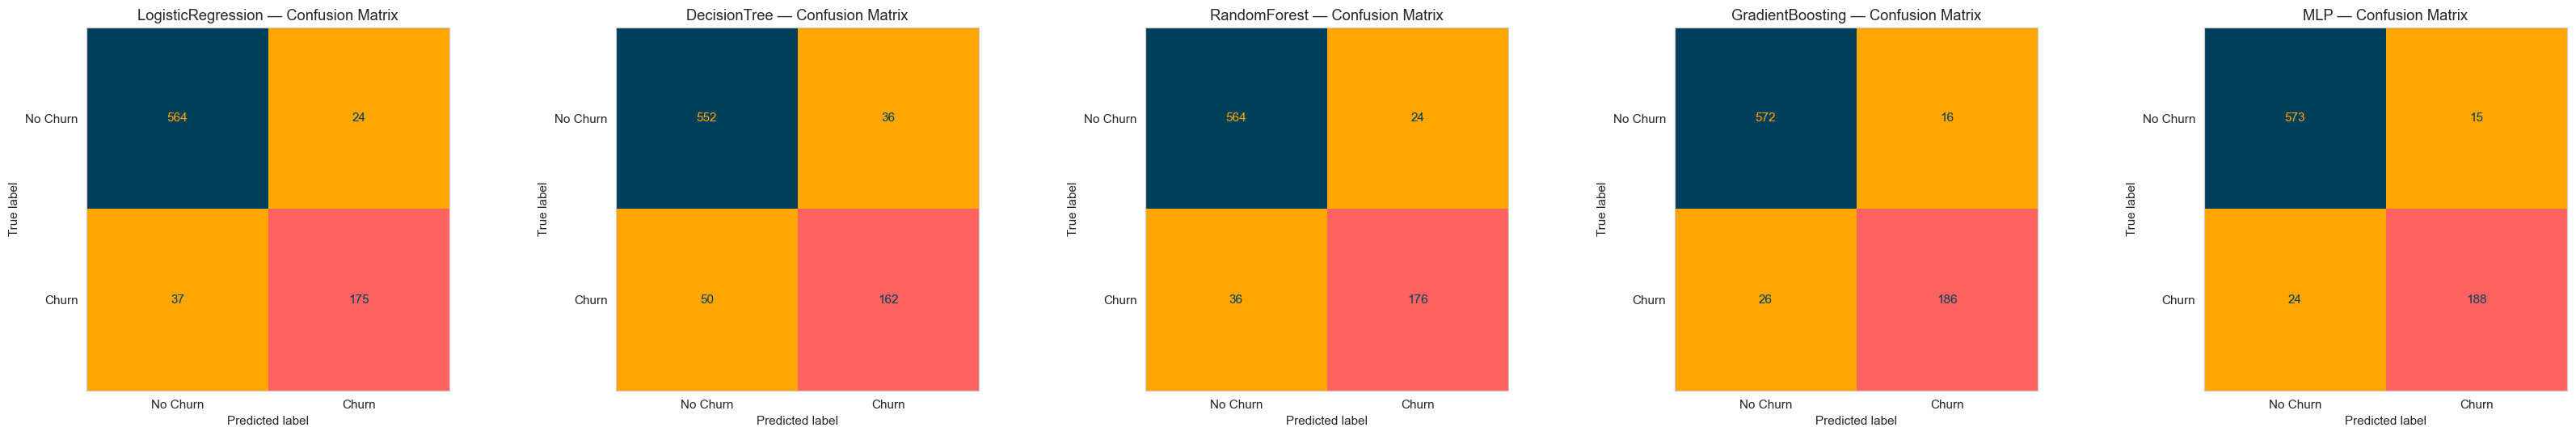

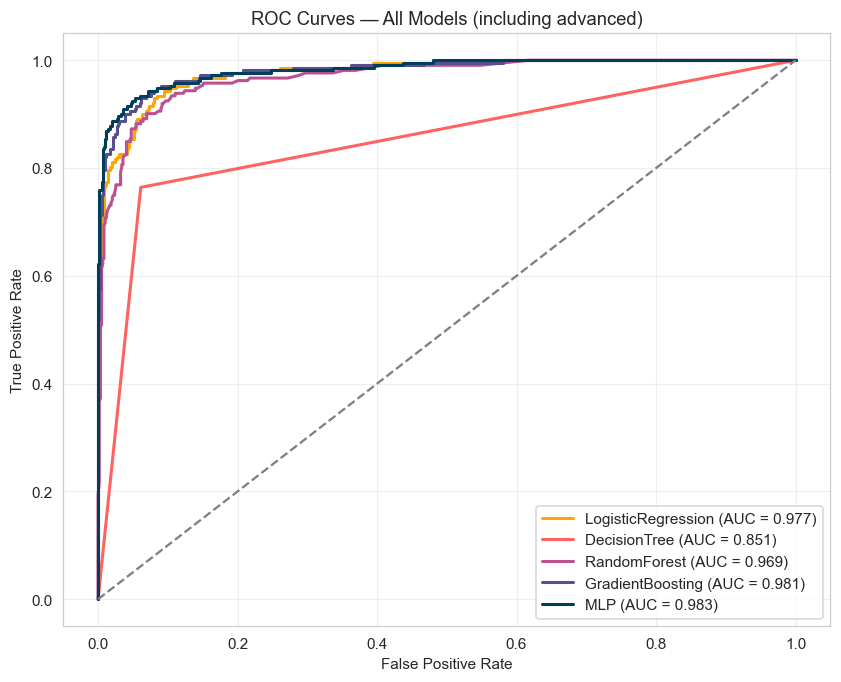

In [17]:
# ===== Part 14: train advanced models =====

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay

# Custom colormap using project palette
cm_cmap = ListedColormap(PALETTE)

MODEL_COLORS = {
    "LogisticRegression": PALETTE[0],
    "DecisionTree": PALETTE[1],
    "RandomForest": PALETTE[2],
    "GradientBoosting": PALETTE[3],
    "MLP": PALETTE[4]
}

# 2) Define advanced model pipelines
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=RANDOM_SEED, n_jobs=-1))
])

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", GradientBoostingClassifier(n_estimators=200, random_state=RANDOM_SEED))
])

mlp_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=RANDOM_SEED))
])

advanced_models = {
    "RandomForest": rf_pipeline,
    "GradientBoosting": gb_pipeline,
    "MLP": mlp_pipeline
}

# 3) Cross-validated ROC-AUC for advanced models
print("=== Advanced Models Cross-validated ROC-AUC ===")
for name, pipeline in advanced_models.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
    print(f"{name}: mean ROC-AUC = {scores.mean():.4f} ± {scores.std():.4f}")

# 4) Fit on full training set and evaluate on test set; store results
for name, pipeline in advanced_models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline[-1], "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else float("nan")

    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

    print(f"\n--- {name} Test Evaluation ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Confusion Matrix Graphs for ALL Models 
fig, axes = plt.subplots(1, len(results), figsize=(6 * len(results), 5))

# Handle single-model case
if len(results) == 1:
    axes = [axes]

for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res["y_pred"])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No Churn", "Churn"]
    )
    disp.plot(
        ax=axes[i],
        cmap=cm_cmap,         
        colorbar=False
    )
    axes[i].set_title(f"{name} — Confusion Matrix")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

# 5) Plot ROC curves for ALL models (baseline + advanced)
plt.figure(figsize=(9,7))

all_model_names = list(results.keys())
for i, name in enumerate(all_model_names):
    res = results[name]
    if res["y_proba"] is not None:
        fpr, tpr, _ = roc_curve(y_test, res["y_proba"])
        roc_auc = auc(fpr, tpr)
        color = MODEL_COLORS.get(name, PALETTE[i % len(PALETTE)])
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", color=color, linewidth=2)
    else:
        print(f"Skipping ROC for {name} (no probability estimates).")

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — All Models (including advanced)")
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


## Part 15 — Feature Importance & Model Explainability (SHAP + Permutation)

Goals:
1. Build readable feature names after preprocessing (handles One-Hot encoding).
2. Extract feature importances from tree models (RandomForest, GradientBoosting).
3. Compute permutation importance for MLP (model-agnostic).
4. Use SHAP:
   - TreeExplainer for tree models (fast).
   - Optional KernelExplainer for MLP (model-agnostic but slow — use a small background sample).

Notes:
- SHAP visualizations (summary plot, bar plot) are produced.
- If KernelExplainer is too slow, rely on permutation importance for MLP.


Running SHAP TreeExplainer for RandomForest & GradientBoosting (themed)...

SHAP summary plot for RandomForest:


<Figure size 990x660 with 0 Axes>

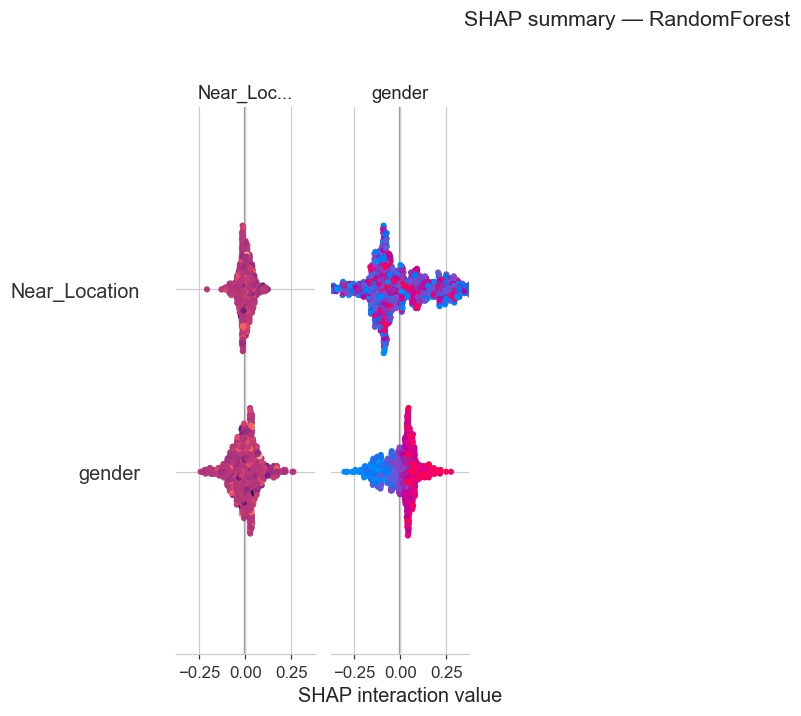


SHAP summary plot for GradientBoosting:
TreeExplainer failed for GradientBoosting: list index out of range

Running KernelExplainer for MLP (small background/sample). This may take time.


  0%|          | 0/50 [00:00<?, ?it/s]


SHAP summary plot for MLP (KernelExplainer):
KernelExplainer for MLP failed or timed out: list index out of range
Set RUN_KERNEL_SHAP=False to skip this step and rely on permutation importance for MLP.

Done: SHAP plots (themed) for tree models and MLP (if enabled).


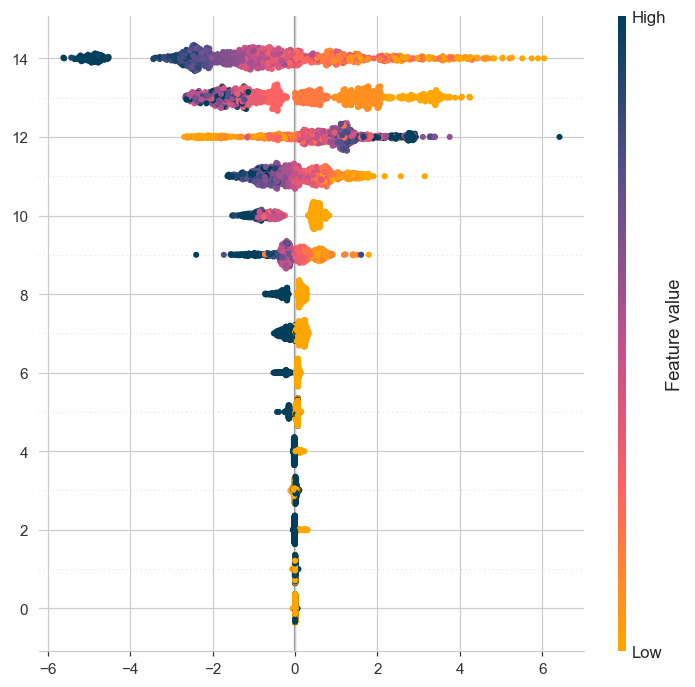

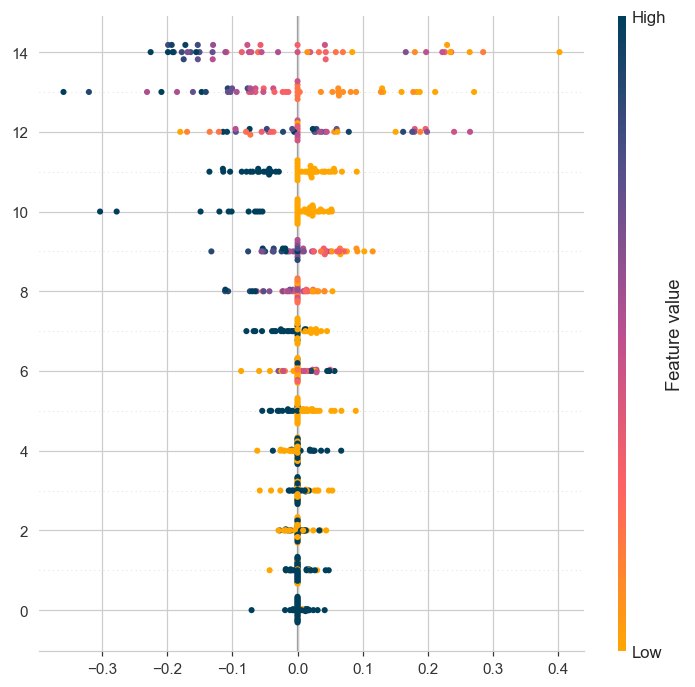

In [18]:
# ===== Part 15 SHAP  =====
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from sklearn.inspection import permutation_importance

# custom palette (must be defined earlier in notebook)
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", PALETTE)

# Get or build feature_names if not already defined
if 'feature_names' not in locals():
    # Fallback: build from original raw features
    feature_names = list(X_test.columns)

# ensure preprocessor fitted and preprocessed arrays exist
preprocessor.fit(X_train)
X_train_pre = preprocessor.transform(X_train)
X_test_pre = preprocessor.transform(X_test)

# Load magma colormap
magma_cmap = cm.get_cmap('magma')

def safe_shap_summary_plot(shap_vals, data, feature_names, title=None, cmap=None, force_recolor=False):
    """
    Draw shap.summary_plot and ensure:
      - it uses provided cmap (string or Colormap) if given
      - otherwise uses `custom_cmap` built from the notebook palette
      - if force_recolor=True, aggressively recolor ALL scatter points with the colormap
      - place a suptitle safely to avoid overlap
    """
    plt.figure(figsize=(9,6))

    # Resolve cmap: allow string like 'magma' or a Colormap instance
    cmap_to_use = None
    if cmap is None:
        cmap_to_use = custom_cmap
    else:
        # if cmap is a string, convert to Colormap
        try:
            if isinstance(cmap, str):
                cmap_to_use = cm.get_cmap(cmap)
            else:
                cmap_to_use = cmap
        except Exception:
            cmap_to_use = custom_cmap

    # Try to call with cmap (works on recent SHAP versions)
    try:
        shap.summary_plot(shap_vals, data, feature_names=feature_names, show=False, cmap=cmap_to_use)
    except TypeError:
        # older SHAP: call without cmap
        shap.summary_plot(shap_vals, data, feature_names=feature_names, show=False)
    
    # Force recolor if requested (for magma on RandomForest)
    if force_recolor and cmap_to_use is not None:
        try:
            fig = plt.gcf()
            ax = fig.axes[0] if fig.axes else plt.gca()
            
            # Normalize shap values to [0, 1] for colormap
            shap_min = shap_vals.min()
            shap_max = shap_vals.max()
            shap_norm = (shap_vals - shap_min) / (shap_max - shap_min + 1e-8)
            
            # Recolor all scatter collections
            for coll in ax.collections:
                try:
                    coll.set_cmap(cmap_to_use)
                    # Set array for color mapping
                    if hasattr(coll, 'set_array'):
                        coll.set_array(shap_norm.flatten())
                    # Normalize the colors
                    coll.set_clim(0, 1)
                except Exception as e:
                    pass
        except Exception as e:
            pass

    # place title as suptitle so it doesn't overlap
    if title:
        plt.gcf().suptitle(title, y=0.98, fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
    else:
        plt.tight_layout()
    plt.show()


# ---- Tree SHAP for RandomForest & GradientBoosting ----
print("Running SHAP TreeExplainer for RandomForest & GradientBoosting (themed)...")

for name in ("RandomForest", "GradientBoosting"):
    pipeline = advanced_models.get(name) if 'advanced_models' in globals() else models.get(name)
    if pipeline is None:
        print(f"Pipeline for {name} not found; skipping.")
        continue
    clf = pipeline.named_steps.get('clf', None)
    if clf is None or not hasattr(clf, "feature_importances_"):
        print(f"Classifier for {name} not found or not tree-based; skipping.")
        continue

    try:
        explainer = shap.TreeExplainer(clf)
        n_sample = min(1000, X_train_pre.shape[0])
        sample_idx = np.random.choice(X_train_pre.shape[0], n_sample, replace=False)
        X_sample = X_train_pre[sample_idx]

        shap_values = explainer.shap_values(X_sample)
        # shap_values typically [class0, class1] for binary classification; select class 1
        if isinstance(shap_values, (list, tuple)) and len(shap_values) > 1:
            shap_vals_for_plot = shap_values[1]
        else:
            shap_vals_for_plot = shap_values

        print(f"\nSHAP summary plot for {name}:")
        # Use magma colormap for RandomForest with force_recolor, default for others
        if name == 'RandomForest':
            safe_shap_summary_plot(shap_vals_for_plot, X_sample, feature_names, 
                                   title=f"SHAP summary — {name}", 
                                   cmap=magma_cmap, 
                                   force_recolor=True)
        else:
            safe_shap_summary_plot(shap_vals_for_plot, X_sample, feature_names, 
                                   title=f"SHAP summary — {name}", 
                                   cmap=None, 
                                   force_recolor=False)

    except Exception as e:
        print(f"TreeExplainer failed for {name}: {e}")


# Kernel SHAP for MLP 
RUN_KERNEL_SHAP = True  

if RUN_KERNEL_SHAP:
    mlp_pipeline = advanced_models.get("MLP", None)
    if mlp_pipeline is None:
        print("MLP pipeline not found — skipping Kernel SHAP for MLP.")
    else:
        print("\nRunning KernelExplainer for MLP (small background/sample). This may take time.")
        try:
            mlp_clf = mlp_pipeline.named_steps['clf']

            # background: small sample from preprocessed train set
            n_background = min(50, X_train_pre.shape[0])
            bg_idx = np.random.choice(X_train_pre.shape[0], n_background, replace=False)
            background = X_train_pre[bg_idx]

            # build KernelExplainer that expects preprocessed arrays
            kernel_explainer = shap.KernelExplainer(lambda z: mlp_clf.predict_proba(z)[:, 1], background)

            # choose small sample to explain
            n_explain = min(50, X_test_pre.shape[0])
            expl_idx = np.random.choice(X_test_pre.shape[0], n_explain, replace=False)
            X_explain = X_test_pre[expl_idx]

            # compute shap values (nsamples controls time/accuracy)
            shap_vals_mlp = kernel_explainer.shap_values(X_explain, nsamples=100)

            if isinstance(shap_vals_mlp, (list, tuple)) and len(shap_vals_mlp) > 1:
                shap_vals_mlp_plot = shap_vals_mlp[1]
            else:
                shap_vals_mlp_plot = shap_vals_mlp

            print("\nSHAP summary plot for MLP (KernelExplainer):")
            safe_shap_summary_plot(shap_vals_mlp_plot, X_explain, feature_names, 
                                   title="SHAP summary — MLP (KernelExplainer)",
                                   cmap=None,
                                   force_recolor=False)

        except Exception as e:
            print("KernelExplainer for MLP failed or timed out:", e)
            print("Set RUN_KERNEL_SHAP=False to skip this step and rely on permutation importance for MLP.")
else:
    print("\nKernel SHAP for MLP skipped (RUN_KERNEL_SHAP=False). Use permutation importance for MLP interpretation.")

print("\nDone: SHAP plots (themed) for tree models and MLP (if enabled).")

## Part 16 — Model Performance Comparison Table

Now that all baseline and advanced models are trained, we compile their key
evaluation metrics into a single comparison table.

This table will include:

- Accuracy  
- Precision  
- Recall  
- F1-score  
- ROC-AUC  

This helps identify the best-performing model and will be used in the report's
Results and Discussion sections.


In [19]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap from your PALETTE
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", PALETTE)

# Build summary table
summary_rows = []
for name, res in results.items():
    summary_rows.append({
        "Model": name,
        "Accuracy": round(res["accuracy"], 4),
        "Precision": round(res["precision"], 4),
        "Recall": round(res["recall"], 4),
        "F1-score": round(res["f1"], 4),
        "ROC-AUC": round(res["roc_auc"], 4),
    })

summary_df = pd.DataFrame(summary_rows).sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

print("=== Model Performance Comparison ===")
display(
    summary_df.style
        .background_gradient(cmap=custom_cmap)   
        .set_properties(**{"font-size": "12pt"})
)

print("\nBest model based on ROC-AUC:", summary_df.iloc[0]["Model"])


=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,MLP,0.951300,0.926100,0.886800,0.906000,0.982700
1,GradientBoosting,0.947500,0.920800,0.877400,0.898600,0.980900
2,LogisticRegression,0.923700,0.879400,0.825500,0.851600,0.977400
3,RandomForest,0.925000,0.880000,0.830200,0.854400,0.969300
4,DecisionTree,0.892500,0.818200,0.764200,0.790200,0.851500



Best model based on ROC-AUC: MLP


## Part 17 — Overfitting Diagnostics

To check whether any model is overfitting, we compare:

- Training performance vs Test performance
- Gap between Train ROC-AUC and Test ROC-AUC

If a model performs significantly better on the training set than the test set,
it indicates overfitting.

The output will show:
- Train Accuracy
- Test Accuracy
- Train ROC-AUC
- Test ROC-AUC
- Gap (Train – Test)


In [20]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import roc_auc_score, accuracy_score

# Create diverging colormap from your PALETTE
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", PALETTE)

overfit_rows = []

for name, pipeline in {**models, **advanced_models}.items():
    # Ensure model is fitted
    pipeline.fit(X_train, y_train)

    # Predict on train
    y_train_pred = pipeline.predict(X_train)
    y_train_proba = pipeline.predict_proba(X_train)[:, 1]

    # Predict on test
    y_test_pred = pipeline.predict(X_test)
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_roc = roc_auc_score(y_train, y_train_proba)
    test_roc = roc_auc_score(y_test, y_test_proba)

    overfit_rows.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Accuracy Gap": round(train_acc - test_acc, 4),
        "Train ROC-AUC": round(train_roc, 4),
        "Test ROC-AUC": round(test_roc, 4),
        "ROC-AUC Gap": round(train_roc - test_roc, 4)
    })

overfit_df = (
    pd.DataFrame(overfit_rows)
    .sort_values(by="ROC-AUC Gap", ascending=False)
    .reset_index(drop=True)
)

print("=== Overfitting Diagnostic Table ===")
display(
    overfit_df.style
        .background_gradient(cmap=custom_cmap)
        .set_properties(**{"font-size": "12pt"})
)


=== Overfitting Diagnostic Table ===


,Model,Train Accuracy,Test Accuracy,Accuracy Gap,Train ROC-AUC,Test ROC-AUC,ROC-AUC Gap
0,DecisionTree,1.000000,0.892500,0.107500,1.000000,0.851500,0.148500
1,RandomForest,1.000000,0.925000,0.075000,1.000000,0.969300,0.030700
2,GradientBoosting,0.977800,0.947500,0.030300,0.997300,0.980900,0.016400
3,MLP,0.982200,0.951300,0.030900,0.998700,0.982700,0.016000
4,LogisticRegression,0.930900,0.923700,0.007200,0.977300,0.977400,-0.000100


## Part 18 — Learning Curves (MLP, GradientBoosting, RandomForest)

Learning curves allow us to visually evaluate:

- Whether a model is overfitting or underfitting
- How performance changes as training data size increases
- Bias–variance tradeoff

We will generate learning curves for:
- MLPClassifier
- GradientBoostingClassifier
- RandomForestClassifier

Each plot will show:
- Training score
- Validation (cross-validation) score

Interpret


Generating learning curves...


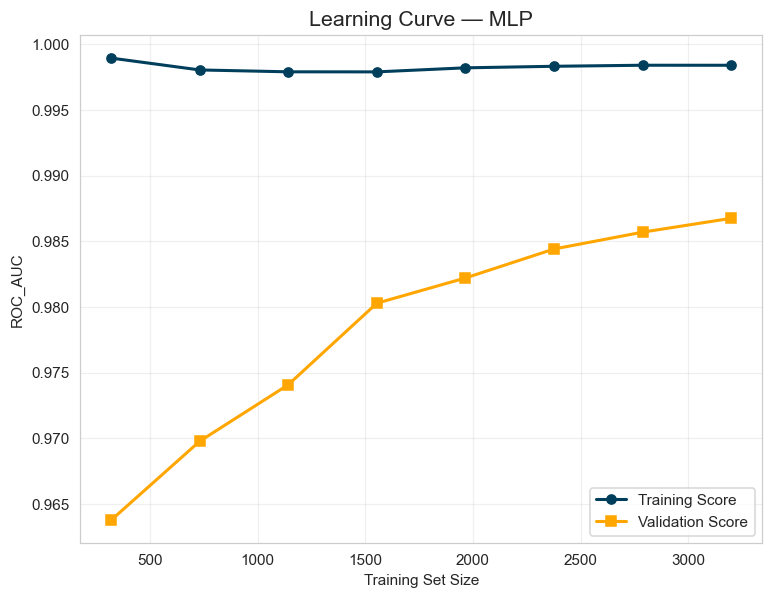

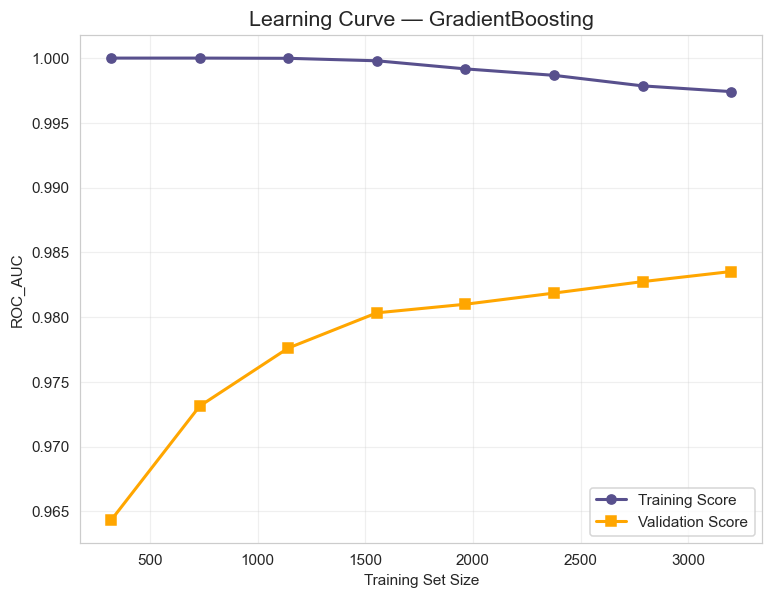

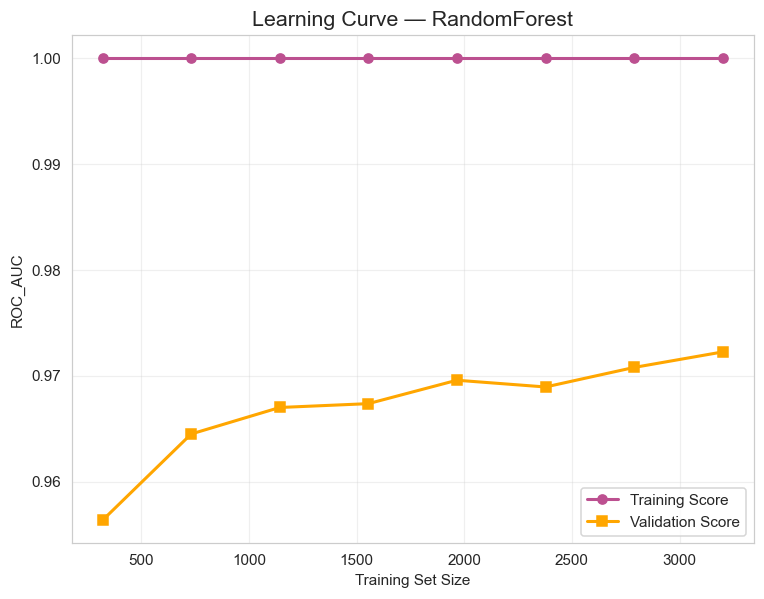

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model_name, pipeline, X, y, scoring="roc_auc", color=PALETTE[0]):
    """
    Generates a learning curve plot for a given model pipeline.
    """
    plt.figure(figsize=(8,6))

    train_sizes, train_scores, val_scores = learning_curve(
        pipeline,
        X, y,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 8),
        shuffle=True,
        random_state=RANDOM_SEED
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, label="Training Score", marker="o", color=color, linewidth=2)
    plt.plot(train_sizes, val_mean, label="Validation Score", marker="s", color=PALETTE[0], linewidth=2)

    plt.title(f"Learning Curve — {model_name}", fontsize=14)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.upper())
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()


# Run learning curves for top-performing models
print("Generating learning curves...")

plot_learning_curve("MLP", advanced_models["MLP"], X, y, scoring="roc_auc", color=MODEL_COLORS["MLP"])
plot_learning_curve("GradientBoosting", advanced_models["GradientBoosting"], X, y, scoring="roc_auc", color=MODEL_COLORS["GradientBoosting"])
plot_learning_curve("RandomForest", advanced_models["RandomForest"], X, y, scoring="roc_auc", color=MODEL_COLORS["RandomForest"])


## Part 19 — Hyperparameter Tuning for MLP (RandomizedSearchCV)

We tune the MLPClassifier to reduce any remaining overfitting and improve ROC-AUC.

Key points:
- We use RandomizedSearchCV over a sensible hyperparameter space (hidden sizes, alpha, learning rate, early stopping).
- Scoring: ROC-AUC with StratifiedKFold (5 splits).
- We report best parameters, CV performance, and final test evaluation (accuracy, precision, recall, f1, ROC-AUC).


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import time

# Retrieve the MLP pipeline
mlp_pipeline = advanced_models.get("MLP")
if mlp_pipeline is None:
    raise RuntimeError("MLP pipeline not found in advanced_models. Make sure you ran the model training cells.")

# Parameter distribution for RandomizedSearch
param_dist = {
    "clf__hidden_layer_sizes": [(50,), (100,), (100,50), (150,), (200,)],
    "clf__alpha": uniform(1e-5, 1e-2),                # L2 regularization strength
    "clf__learning_rate_init": uniform(1e-4, 1e-2),   # initial learning rate
    "clf__early_stopping": [True, False],
    "clf__validation_fraction": [0.1],                # when early_stopping=True
    "clf__tol": [1e-4, 1e-3],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
rs = RandomizedSearchCV(
    estimator=mlp_pipeline,
    param_distributions=param_dist,
    n_iter=20,                 # number of random parameter settings to try
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=RANDOM_SEED,
    return_train_score=True
)

print("Starting RandomizedSearchCV for MLP (this may take a few minutes)...")
t0 = time.time()
rs.fit(X_train, y_train)
t1 = time.time()
print(f"RandomizedSearchCV done in {(t1-t0)/60:.2f} minutes")

# Best params and CV results
print("\n=== Best parameters ===")
print(rs.best_params_)
print(f"Best CV ROC-AUC: {rs.best_score_:.4f}")

# Re-evaluate best estimator on the test set
best_mlp = rs.best_estimator_
y_test_pred = best_mlp.predict(X_test)
y_test_proba = best_mlp.predict_proba(X_test)[:,1]

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc = roc_auc_score(y_test, y_test_proba)

print("\n=== Test set evaluation for tuned MLP ===")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"F1-score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc:.4f}")

# Update results dictionary and print comparison
results["MLP_tuned"] = {
    "accuracy": test_acc,
    "precision": test_prec,
    "recall": test_rec,
    "f1": test_f1,
    "roc_auc": test_roc,
    "y_pred": y_test_pred,
    "y_proba": y_test_proba
}

# Show CV results summary (top 5)
cv_results_df = pd.DataFrame(rs.cv_results_).sort_values("mean_test_score", ascending=False)
display(cv_results_df[["params","mean_train_score","mean_test_score","std_test_score"]].head(5))

print("\nAdded 'MLP_tuned' to results. You may choose this as final model if it improves generalization.")


Starting RandomizedSearchCV for MLP (this may take a few minutes)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV done in 0.31 minutes

=== Best parameters ===
{'clf__alpha': np.float64(0.0072299877226682475), 'clf__early_stopping': False, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': np.float64(0.0019182496720710062), 'clf__tol': 0.0001, 'clf__validation_fraction': 0.1}
Best CV ROC-AUC: 0.9855

=== Test set evaluation for tuned MLP ===
Accuracy: 0.9475
Precision: 0.9009
Recall: 0.9009
F1-score: 0.9009
ROC-AUC: 0.9802


,params,mean_train_score,mean_test_score,std_test_score
3,"{'clf__alpha': 0.0072299877226682475, 'clf__ea...",0.999765,0.985530,0.001549
12,"{'clf__alpha': 0.0031271107608941097, 'clf__ea...",0.999777,0.985404,0.002064
4,"{'clf__alpha': 0.006184815096277165, 'clf__ear...",0.999934,0.984996,0.002101
13,"{'clf__alpha': 0.009705846277645586, 'clf__ear...",0.999493,0.984596,0.003453
16,"{'clf__alpha': 0.003577533266935893, 'clf__ear...",0.999911,0.983941,0.003304



Added 'MLP_tuned' to results. You may choose this as final model if it improves generalization.


## Part 20 — Save Final Model and Reproducibility Artifacts

We save the final selected model pipeline (the original MLP pipeline) together with:
- model file (`/mnt/data/final_mlp_pipeline.pkl`)
- model metrics (`/mnt/data/final_model_metrics.json`)
- README snippet (`/mnt/data/MODEL_README.txt`)
- requirements (`/mnt/data/requirements.txt`)

We then demonstrate re-loading the saved pipeline and running a prediction on a single test sample to confirm correctness.


In [23]:
# ===== Part 20 (FIXED): Save final model pipeline, metrics, README snippet, and requirements.txt =====

import joblib
import json
import subprocess
from pathlib import Path

out_dir = Path("data")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) Select final model pipeline (original MLP)
final_model_name = "MLP"
final_pipeline = advanced_models.get(final_model_name)

if final_pipeline is None:
    raise RuntimeError(f"Final pipeline '{final_model_name}' not found in advanced_models.")

# 2) Ensure it is fitted
try:
    _ = final_pipeline.named_steps['clf'].classes_
except Exception:
    print("Final MLP was not fitted — fitting now...")
    final_pipeline.fit(X_train, y_train)

# 3) Save the pipeline
model_path = out_dir / "final_mlp_pipeline.pkl"
joblib.dump(final_pipeline, model_path)
print("Saved final pipeline to:", model_path)

# 4) Save model metrics
metrics = results.get(final_model_name)
if metrics is None:
    raise RuntimeError(f"No metrics found for model '{final_model_name}' in results.")

metrics_out_path = out_dir / "final_model_metrics.json"
with open(metrics_out_path, "w") as f:
    json.dump({
        "model": final_model_name,
        "metrics": {
            "accuracy": float(metrics["accuracy"]),
            "precision": float(metrics["precision"]),
            "recall": float(metrics["recall"]),
            "f1": float(metrics["f1"]),
            "roc_auc": float(metrics["roc_auc"])
        }
    }, f, indent=2)
print("Saved metrics JSON to:", metrics_out_path)

# 5) Write README snippet (no backticks — safe for Python)
readme_text = (
    "Final model pipeline: final_mlp_pipeline.pkl\n\n"
    "How to load and predict:\n"
    "import joblib\n"
    "pipe = joblib.load('final_mlp_pipeline.pkl')\n"
    "proba = pipe.predict_proba(x_new)[:,1]\n"
    "pred = pipe.predict(x_new)\n\n"
    f"Saved metrics file: {metrics_out_path.name}"
)

readme_path = out_dir / "MODEL_README.txt"
with open(readme_path, "w") as f:
    f.write(readme_text)
print("Saved MODEL_README.txt to:", readme_path)

# 6) Save requirements
req_path = out_dir / "requirements.txt"
try:
    proc = subprocess.run(["pip", "freeze"], capture_output=True, text=True)
    with open(req_path, "w") as f:
        f.write(proc.stdout)
    print("Saved requirements.txt to:", req_path)
except Exception as e:
    print("Could not save requirements:", e)

# 7) Load test
print("\nLoading saved model for test prediction...")
loaded_pipe = joblib.load(model_path)

x_sample = X_test.iloc[[0]]
print("Sample:")
display(x_sample)

pred = loaded_pipe.predict(x_sample)
proba = loaded_pipe.predict_proba(x_sample)[:,1]

print("Prediction:", pred[0])
print("Probability (class=1):", float(proba[0]))

print("\nArtifacts saved in /mnt/data:")
print(list(out_dir.iterdir()))


Saved final pipeline to: data\final_mlp_pipeline.pkl
Saved metrics JSON to: data\final_model_metrics.json
Saved MODEL_README.txt to: data\MODEL_README.txt
Saved requirements.txt to: data\requirements.txt

Loading saved model for test prediction...
Sample:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,kmeans_cluster
1799,1,0,1,0,1,1,1,29,21.256169,1.0,7,0.500421,0.503047,0.0


Prediction: 0
Probability (class=1): 0.0001848640862426896

Artifacts saved in /mnt/data:
[WindowsPath('data/final_mlp_pipeline.pkl'), WindowsPath('data/final_model_metrics.json'), WindowsPath('data/MODEL_README.txt'), WindowsPath('data/requirements.txt')]
